# Task 1

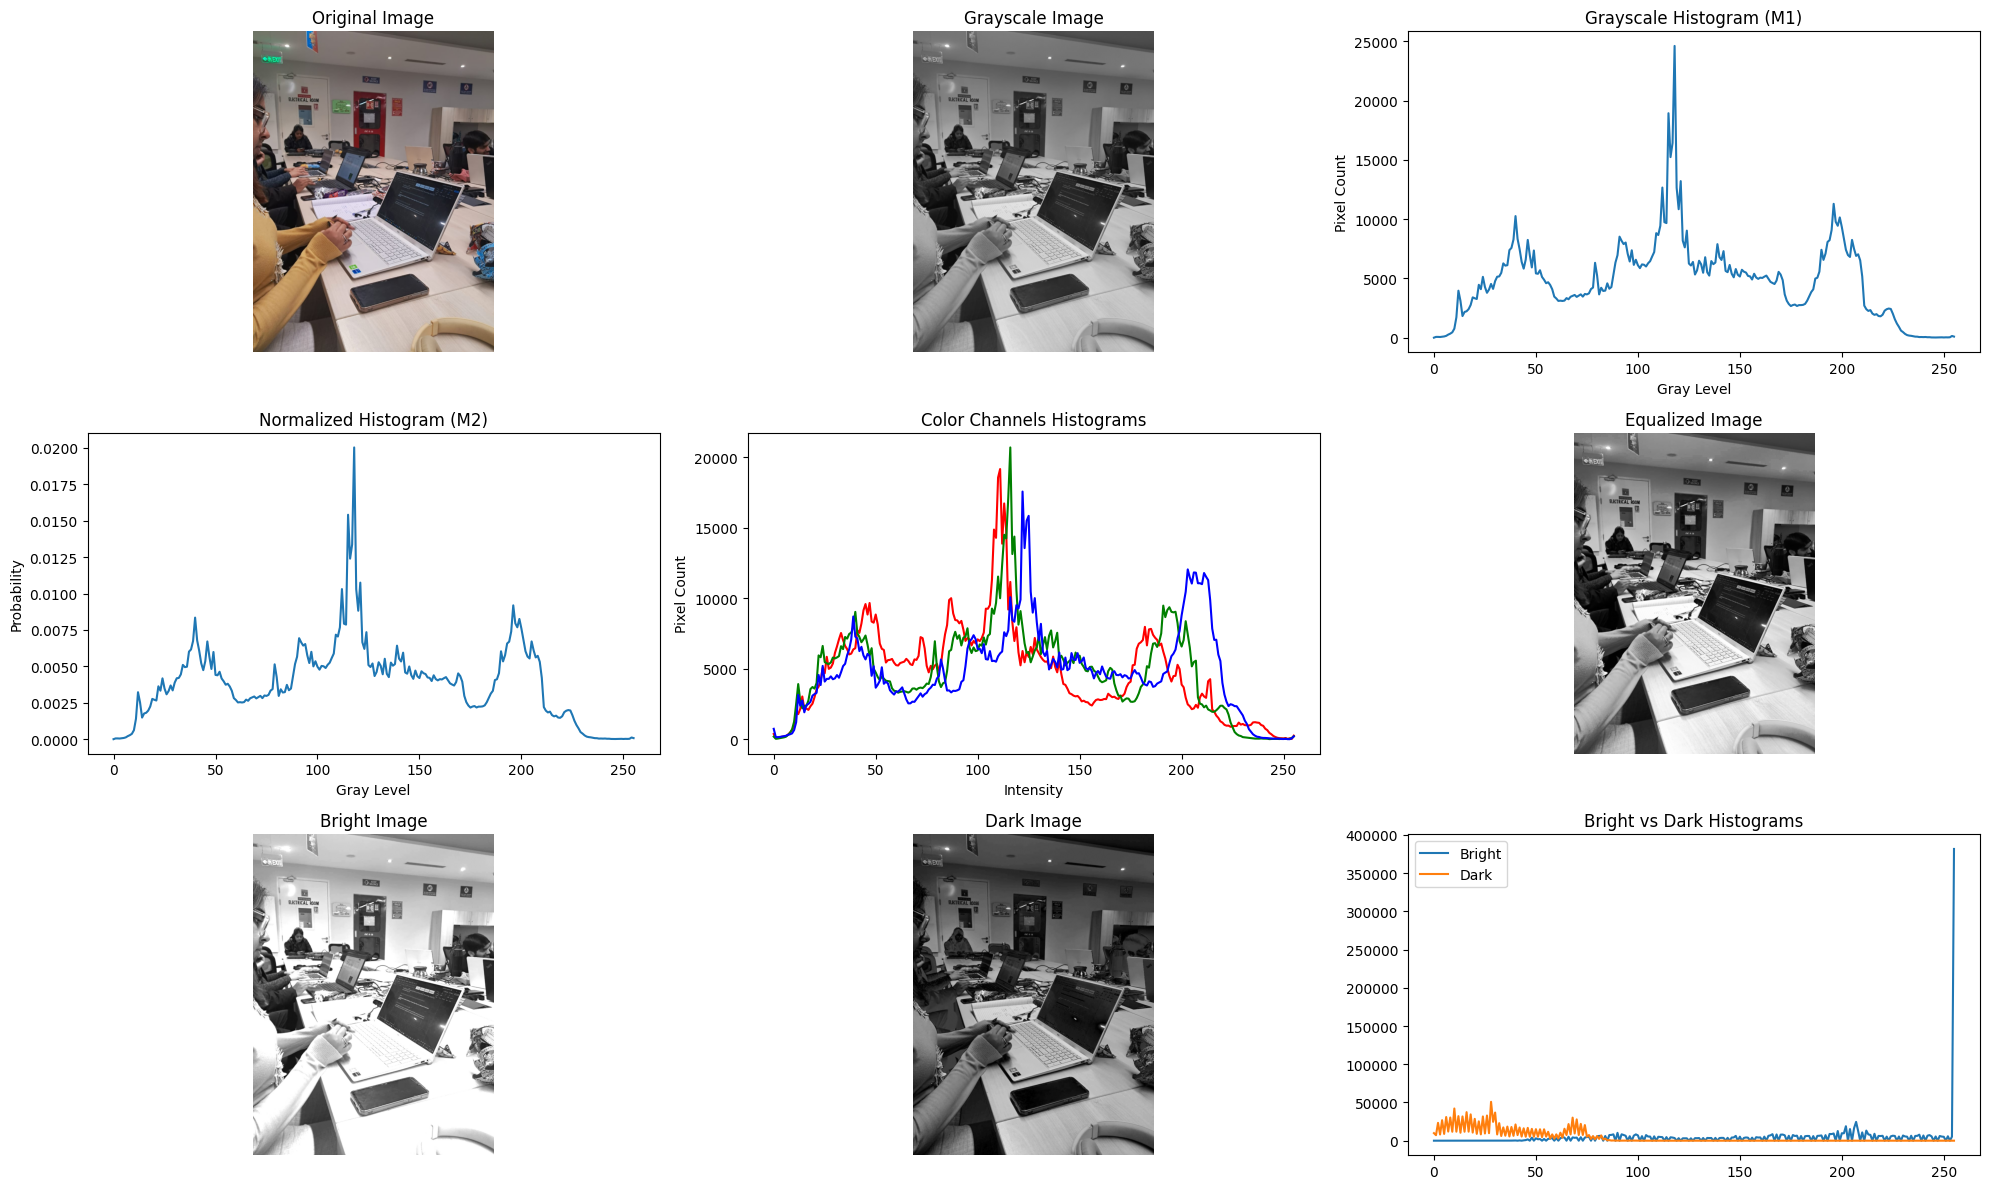

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def analyze_image_histograms(image_path):
    # Read the image
    img = cv2.imread(image_path)

    # Convert BGR to RGB for proper display
    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Convert to grayscale
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Calculate histogram for grayscale image
    gray_hist = cv2.calcHist([gray_img], [0], None, [256], [0, 256])

    # Calculate normalized histogram (probability)
    gray_hist_norm = gray_hist / (gray_img.shape[0] * gray_img.shape[1])

    # Calculate histograms for each color channel
    color_hists = []
    colors = ['r', 'g', 'b']
    for i, col in enumerate(colors):
        hist = cv2.calcHist([img], [i], None, [256], [0, 256])
        color_hists.append(hist)

    # Perform histogram equalization on grayscale image
    equalized_img = cv2.equalizeHist(gray_img)
    equalized_hist = cv2.calcHist([equalized_img], [0], None, [256], [0, 256])

    # Create bright and dark versions of grayscale image
    bright_img = cv2.convertScaleAbs(gray_img, alpha=1.5, beta=30)
    dark_img = cv2.convertScaleAbs(gray_img, alpha=0.5, beta=-30)

    # Calculate histograms for bright and dark images
    bright_hist = cv2.calcHist([bright_img], [0], None, [256], [0, 256])
    dark_hist = cv2.calcHist([dark_img], [0], None, [256], [0, 256])

    # Plotting
    plt.figure(figsize=(20, 12))

    # Original color image
    plt.subplot(331)
    plt.imshow(rgb_img)
    plt.title('Original Image')
    plt.axis('off')

    # Grayscale image
    plt.subplot(332)
    plt.imshow(gray_img, cmap='gray')
    plt.title('Grayscale Image')
    plt.axis('off')

    # Method 1: Regular histogram
    plt.subplot(333)
    plt.plot(gray_hist)
    plt.title('Grayscale Histogram (M1)')
    plt.xlabel('Gray Level')
    plt.ylabel('Pixel Count')

    # Method 2: Normalized histogram
    plt.subplot(334)
    plt.plot(gray_hist_norm)
    plt.title('Normalized Histogram (M2)')
    plt.xlabel('Gray Level')
    plt.ylabel('Probability')

    # Color channels histograms
    plt.subplot(335)
    for hist, col in zip(color_hists, colors):
        plt.plot(hist, color=col)
    plt.title('Color Channels Histograms')
    plt.xlabel('Intensity')
    plt.ylabel('Pixel Count')

    # Histogram equalization results
    plt.subplot(336)
    plt.imshow(equalized_img, cmap='gray')
    plt.title('Equalized Image')
    plt.axis('off')

    # Bright and dark images with their histograms
    plt.subplot(337)
    plt.imshow(bright_img, cmap='gray')
    plt.title('Bright Image')
    plt.axis('off')

    plt.subplot(338)
    plt.imshow(dark_img, cmap='gray')
    plt.title('Dark Image')
    plt.axis('off')

    plt.subplot(339)
    plt.plot(bright_hist, label='Bright')
    plt.plot(dark_hist, label='Dark')
    plt.title('Bright vs Dark Histograms')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Example usage
analyze_image_histograms('/content/imageexperi.jpg')

# Tast 2

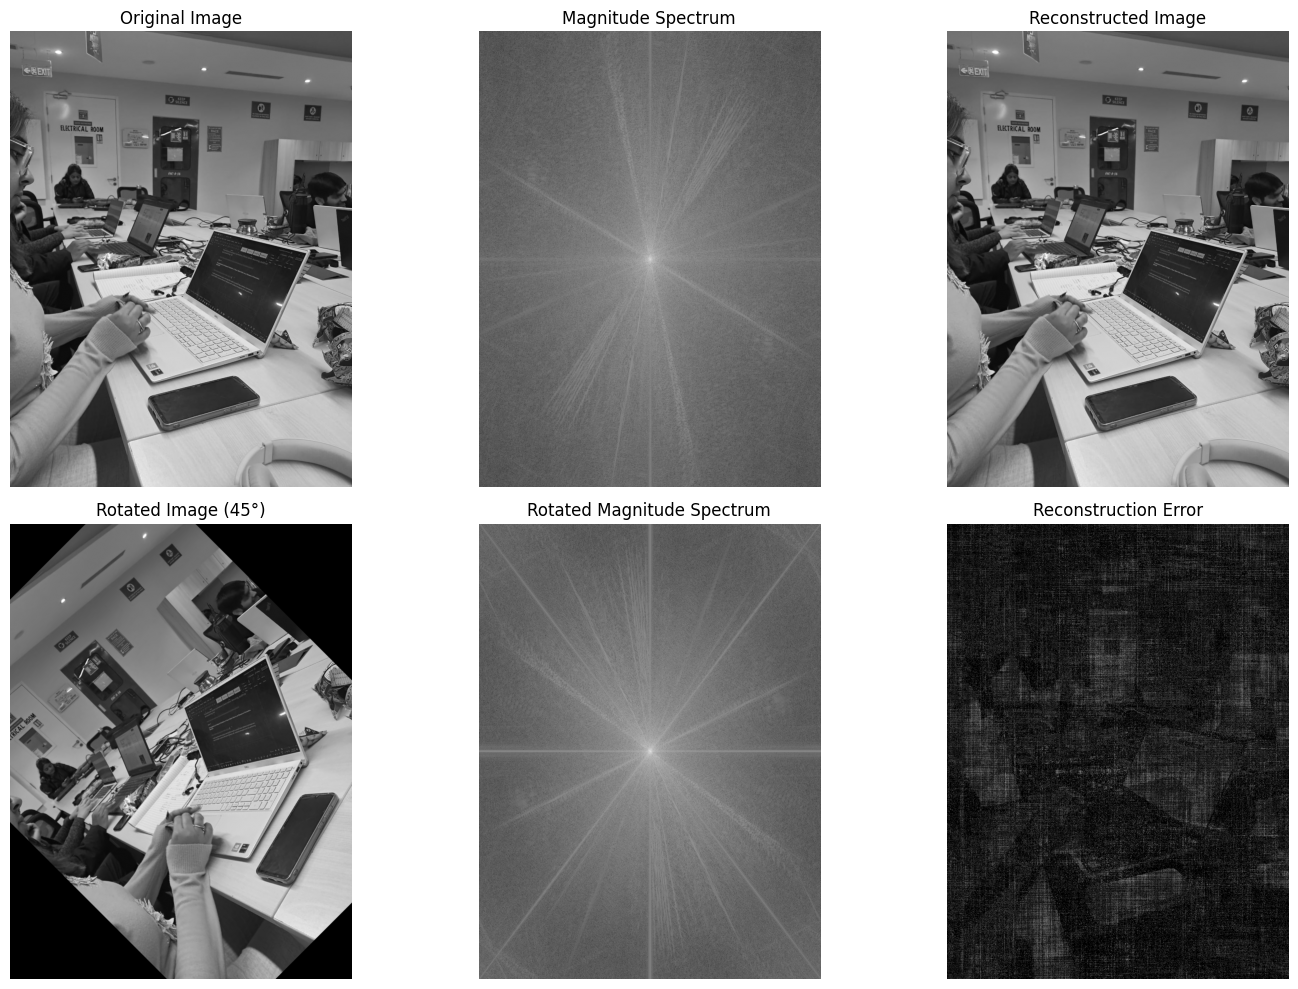

Maximum reconstruction error: 1.4210854715202004e-13
Mean reconstruction error: 1.5548185272945232e-14


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def analyze_fourier_transform(image_path, rotation_angle=45):
    # Read and convert image to grayscale
    img = cv2.imread(image_path, 0)  # Read as grayscale

    # Compute FFT of original image
    f_transform = np.fft.fft2(img)
    f_shift = np.fft.fftshift(f_transform)
    magnitude_spectrum = 20 * np.log(np.abs(f_shift))

    # Compute IFFT to reconstruct the image
    f_ishift = np.fft.ifftshift(f_shift)
    img_reconstructed = np.fft.ifft2(f_ishift)
    img_reconstructed = np.abs(img_reconstructed)

    # Rotate the image
    rows, cols = img.shape
    M = cv2.getRotationMatrix2D((cols/2, rows/2), rotation_angle, 1)
    rotated_img = cv2.warpAffine(img, M, (cols, rows))

    # Compute FFT of rotated image
    f_transform_rotated = np.fft.fft2(rotated_img)
    f_shift_rotated = np.fft.fftshift(f_transform_rotated)
    magnitude_spectrum_rotated = 20 * np.log(np.abs(f_shift_rotated))

    # Plotting
    plt.figure(figsize=(15, 10))

    # Original image
    plt.subplot(231)
    plt.imshow(img, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    # Magnitude spectrum of original image
    plt.subplot(232)
    plt.imshow(magnitude_spectrum, cmap='gray')
    plt.title('Magnitude Spectrum')
    plt.axis('off')

    # Reconstructed image
    plt.subplot(233)
    plt.imshow(img_reconstructed, cmap='gray')
    plt.title('Reconstructed Image')
    plt.axis('off')

    # Rotated image
    plt.subplot(234)
    plt.imshow(rotated_img, cmap='gray')
    plt.title(f'Rotated Image ({rotation_angle}°)')
    plt.axis('off')

    # Magnitude spectrum of rotated image
    plt.subplot(235)
    plt.imshow(magnitude_spectrum_rotated, cmap='gray')
    plt.title('Rotated Magnitude Spectrum')
    plt.axis('off')

    # Error visualization between original and reconstructed
    error = np.abs(img - img_reconstructed)
    plt.subplot(236)
    plt.imshow(error, cmap='gray')
    plt.title('Reconstruction Error')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    # Print some statistics about the reconstruction
    print("Maximum reconstruction error:", np.max(error))
    print("Mean reconstruction error:", np.mean(error))

# Example usage
analyze_fourier_transform('/content/imageexperi.jpg')